In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import ROOT

Welcome to JupyROOT 6.28/00


In [2]:
files = glob.glob("../data/MPPC_data/S14_*.dat")
files

['../data/MPPC_data/S14_412.dat',
 '../data/MPPC_data/S14_414.dat',
 '../data/MPPC_data/S14_416.dat',
 '../data/MPPC_data/S14_418.dat',
 '../data/MPPC_data/S14_420.dat']

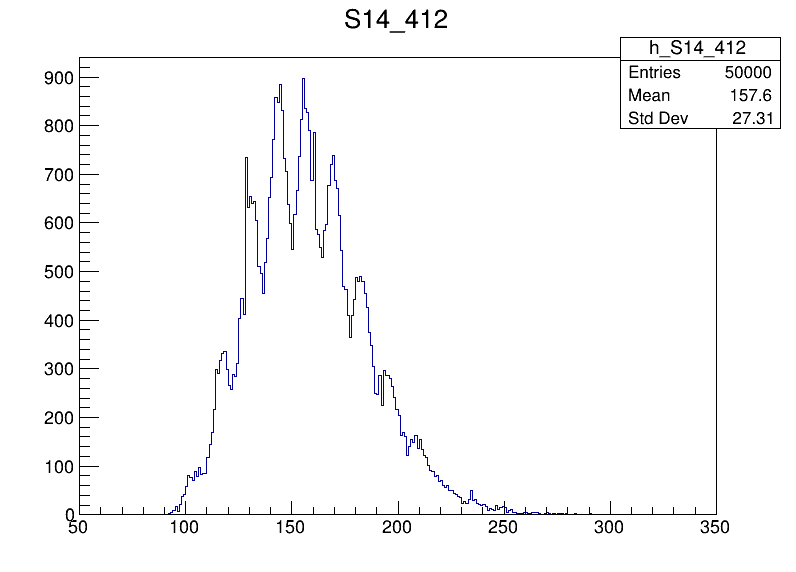

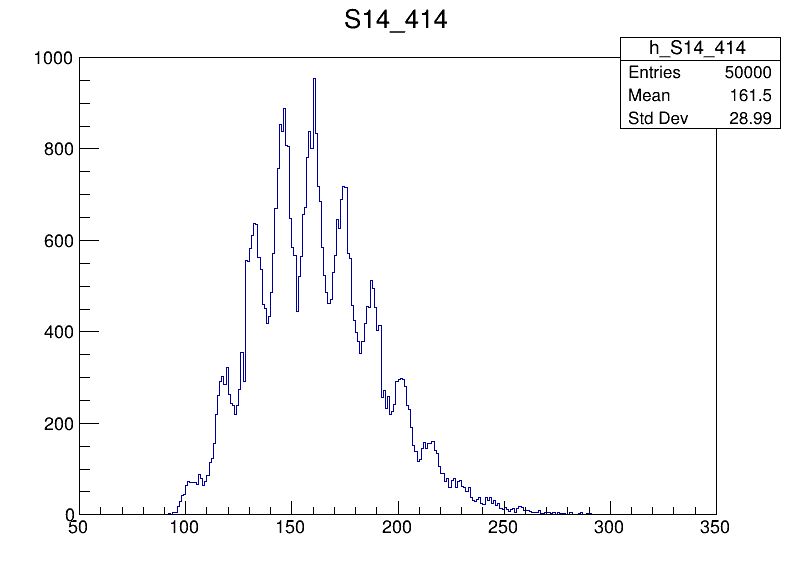

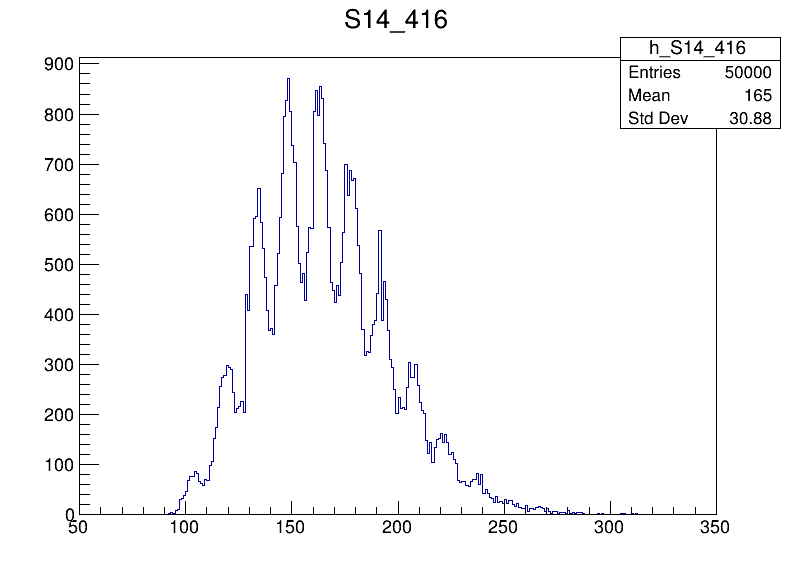

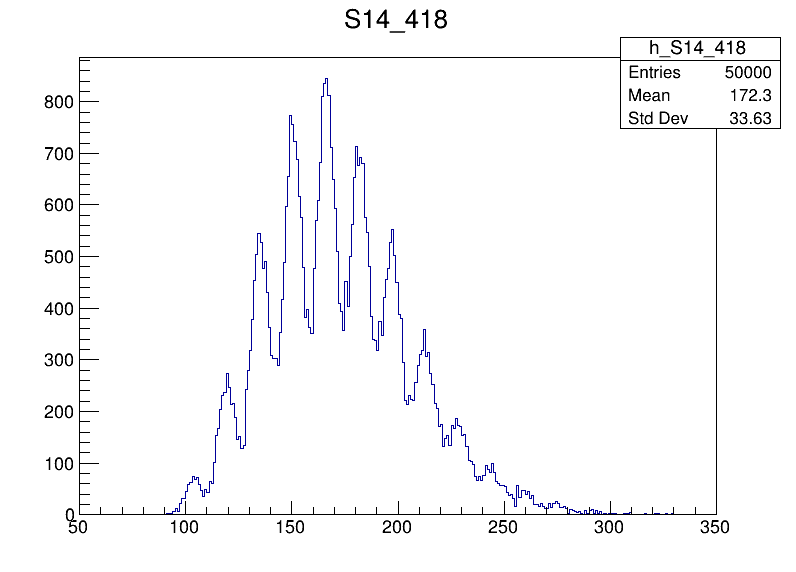

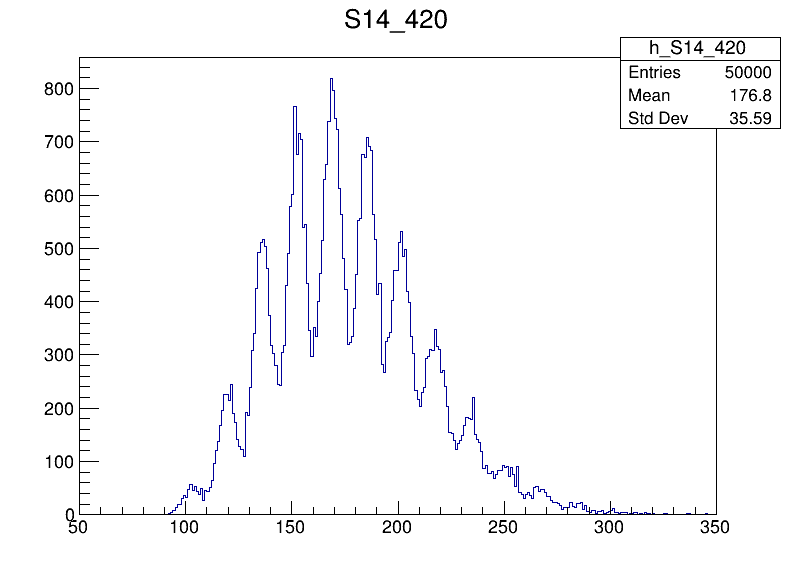

In [3]:
canvases = []
histograms = []

for file in files:
    c = ROOT.TCanvas("c_"+os.path.basename(file).replace(".dat", ""), os.path.basename(file).replace(".dat", ""), 800, 600)
    hist = ROOT.TH1D("h_"+os.path.basename(file).replace(".dat", ""), os.path.basename(file).replace(".dat", ""), 300, 50, 350)
    with open(file, "r") as f:
        for line in f:
            hist.Fill(float(line.strip()))
    histograms.append(hist)
    canvases.append(c)
    
for i in range(len(files)):
    canvases[i].cd()
    histograms[i].Draw()
    canvases[i].Draw()

In [6]:
def save_data_to_tree():
    # ファイルを作成し、TTreeを作成する
    file = ROOT.TFile("data.root", "RECREATE")
    tree = ROOT.TTree("tree_name", "tree_title")

    # 3つの一次元データ用のnumpy arrayを宣言する
    import numpy as np
    data1 = np.zeros(100, dtype=np.int32)
    data2 = np.zeros(100, dtype=np.int32)
    data3 = np.zeros(100, dtype=np.int32)

    # TBranchをTTreeに追加する
    tree.Branch("data1", data1, "data1[100]/I")
    tree.Branch("data2", data2, "data2[100]/I")
    tree.Branch("data3", data3, "data3[100]/I")

    # データを入力する
    for i in range(100):
        data1[i] = i
        data2[i] = i * 2
        data3[i] = i * 3

    # TTreeにデータを書き込む
    tree.Fill()

    # ファイルを保存して閉じる
    file.Write()
    file.Close()
    
save_data_to_tree()

In [ ]:
# save datfile and TH1D to root file
f = ROOT.TFile("../data/MPPC_data/MPPC_data.root", "RECREATE")


In [4]:
sp = ROOT.TSpectrum()
n_peaks = sp.Search(histograms[0], 1, "")
_x = sp.GetPositionX()
_y = sp.GetPositionY()

x = [_x[i] for i in range(n_peaks)]
y = [_y[i] for i in range(n_peaks)]

print(x)
print(y)

sort_order = np.argsort(x)

#sort x and y
x = [x[i] for i in sort_order]
y = [y[i] for i in sort_order]

print(x)
print(y)

# フィット範囲を設定
fdif = x[5] - x[4]
fmin = x[2] - 0.5*fdif
fmax = x[7] + 0.5*fdif

# フィット関数を作成し、初期パラメータを設定
gaus_sum = ROOT.TF1("gaus_sum", "gaus(0) + gaus(3) + gaus(6) + gaus(9) + gaus(12) + gaus(15)", fmin, fmax)
for i in range(6):
    gaus_sum.SetParameter(i*3, y[i+2])
    gaus_sum.SetParameter(i*3+1, x[i+2])
    gaus_sum.SetParameter(i*3+2, 10)

# フィット
hist.Fit(gaus_sum, "R")
gaus_sum.Draw("same")

[156.5, 143.5, 169.5, 129.5, 183.5, 116.5, 196.5, 101.5, 234.5, 210.5]
[836.0, 848.0, 739.0, 631.0, 480.0, 317.0, 280.0, 80.0, 49.0, 155.0]
[101.5, 116.5, 129.5, 143.5, 156.5, 169.5, 183.5, 196.5, 210.5, 234.5]
[80.0, 317.0, 631.0, 848.0, 836.0, 739.0, 480.0, 280.0, 155.0, 49.0]
 FCN=1582.75 FROM MIGRAD    STATUS=FAILED       3506 CALLS        3507 TOTAL
                     EDM=6.31823e+06    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  25.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.31582e+03   2.67711e+02  -0.00000e+00   0.00000e+00
   2  p1           8.71589e+01   3.11912e-01  -0.00000e+00  -6.24427e-12
   3  p2          -3.28697e+00   8.81071e+00  -0.00000e+00  -2.57522e+00
   4  p3           4.53858e+02   3.59998e+00   0.00000e+00   2.00888e-04
   5  p4           1.51505e+02   1.91209e-01  -0.00000e+00  -1.41059e-01
   6  p5           1.77712e+01   1.60225e

Warning in <Fit>: Abnormal termination of minimization.


[156.5, 143.5, 169.5, 129.5, 183.5, 116.5, 196.5, 101.5, 234.5, 210.5]
[836.0, 848.0, 739.0, 631.0, 480.0, 317.0, 280.0, 80.0, 49.0, 155.0]
[101.5, 116.5, 129.5, 143.5, 156.5, 169.5, 183.5, 196.5, 210.5, 234.5]
[80.0, 317.0, 631.0, 848.0, 836.0, 739.0, 480.0, 280.0, 155.0, 49.0]
[145.5, 174.5, 160.5, 131.5, 188.5, 117.5, 202.5, 216.5, 101.5]
[839.0, 717.0, 953.0, 611.0, 494.0, 303.0, 295.0, 160.0, 72.0]
[101.5, 117.5, 131.5, 145.5, 160.5, 174.5, 188.5, 202.5, 216.5]
[72.0, 303.0, 611.0, 839.0, 953.0, 717.0, 494.0, 295.0, 160.0]
[148.5, 163.5, 191.5, 178.5, 133.5, 118.5, 208.5, 237.5, 103.5, 222.5]
[870.0, 856.0, 568.0, 667.0, 595.0, 278.0, 300.0, 82.0, 76.0, 160.0]
[103.5, 118.5, 133.5, 148.5, 163.5, 178.5, 191.5, 208.5, 222.5, 237.5]
[76.0, 278.0, 595.0, 870.0, 856.0, 667.0, 568.0, 300.0, 160.0, 82.0]
[166.5, 150.5, 134.5, 181.5, 197.5, 212.5, 118.5, 228.5, 103.5, 244.5]
[844.0, 755.0, 544.0, 677.0, 552.0, 358.0, 237.0, 173.0, 74.0, 99.0]
[103.5, 118.5, 134.5, 150.5, 166.5, 181.5, 197

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_S14_412
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_S14_414
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_S14_416
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_S14_418
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_S14_420
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


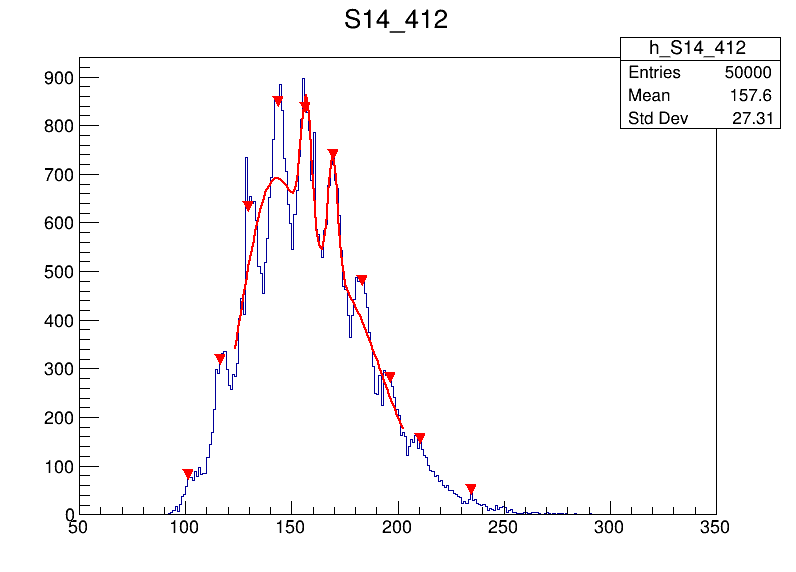

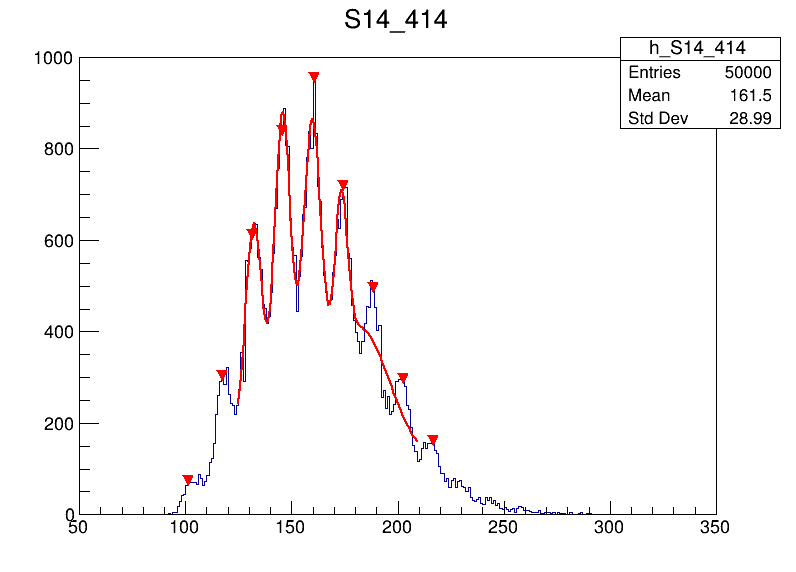

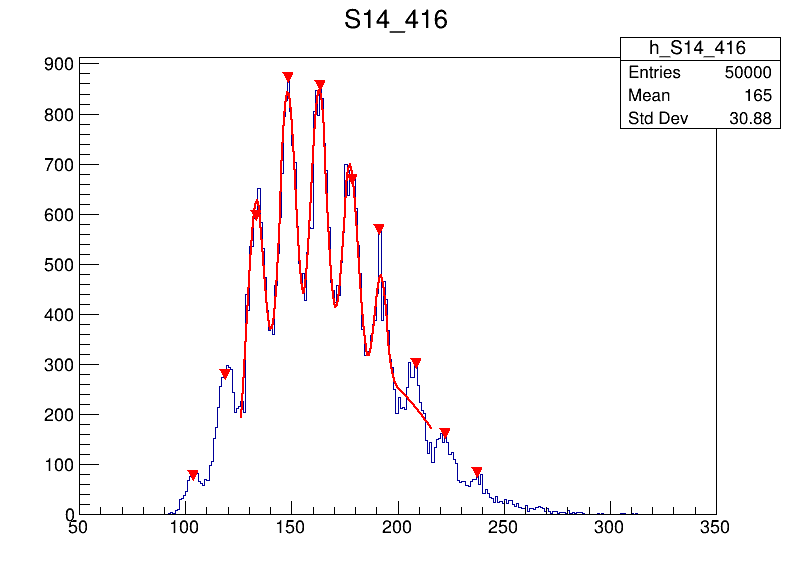

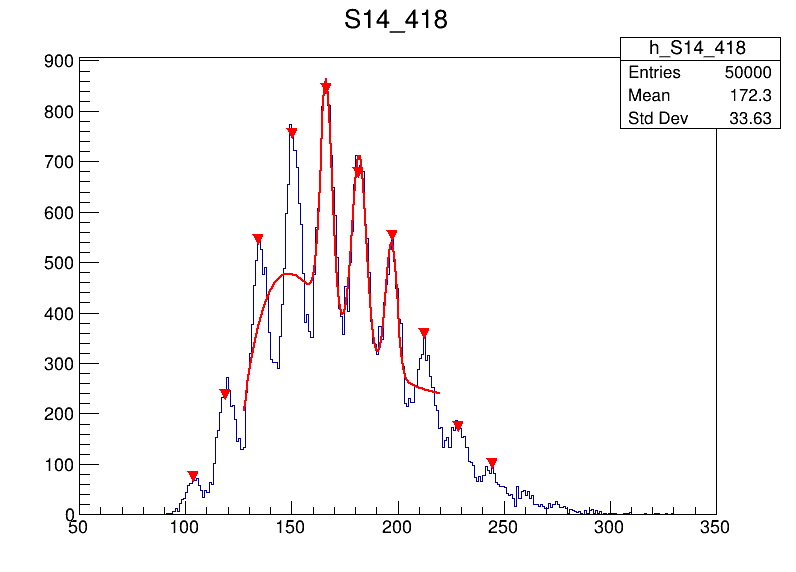

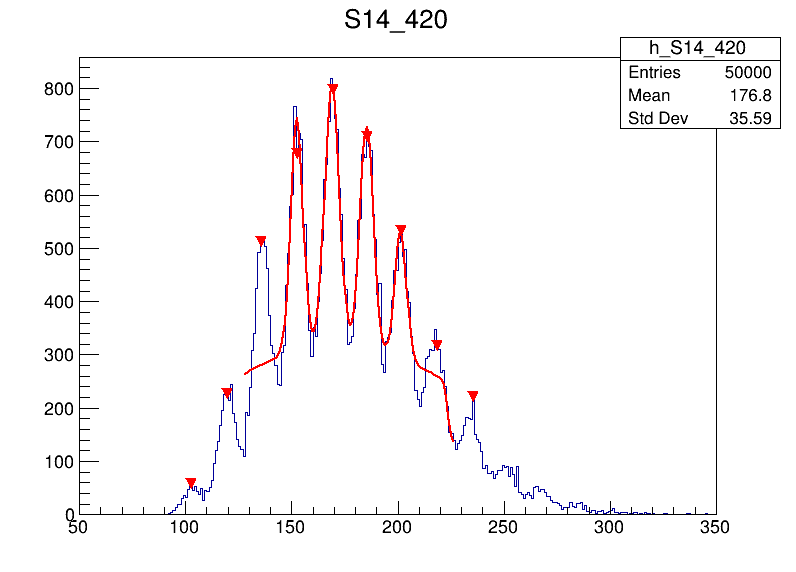

In [5]:
canvases = []
histograms = []
fit_functions = []

for file in files:
    c = ROOT.TCanvas("c_"+os.path.basename(file).replace(".dat", ""), os.path.basename(file).replace(".dat", ""), 800, 600)
    hist = ROOT.TH1D("h_"+os.path.basename(file).replace(".dat", ""), os.path.basename(file).replace(".dat", ""), 300, 50, 350)
    with open(file, "r") as f:
        for line in f:
            hist.Fill(float(line.strip()))
            
    histograms.append(hist)
    canvases.append(c)
    
    sp = ROOT.TSpectrum()
    n_peaks = sp.Search(hist, 1, "")
    _x = sp.GetPositionX()
    _y = sp.GetPositionY()

    x = [_x[i] for i in range(n_peaks)]
    y = [_y[i] for i in range(n_peaks)]

    print(x)
    print(y)

    sort_order = np.argsort(x)

    #sort x and y
    x = [x[i] for i in sort_order]
    y = [y[i] for i in sort_order]

    print(x)
    print(y)

    # フィット範囲を設定
    fdif = x[5] - x[4]
    fmin = x[2] - 0.5*fdif
    fmax = x[7] + 0.5*fdif

    # フィット関数を作成し、初期パラメータを設定
    gaus_sum = ROOT.TF1("f_"+os.path.basename(file).replace(".dat", ""), "gaus(0) + gaus(3) + gaus(6) + gaus(9) + gaus(12) + gaus(15)", fmin, fmax)
    for i in range(6):
        gaus_sum.SetParameter(i*3, y[i+2])
        gaus_sum.SetParameter(i*3+1, x[i+2])
        gaus_sum.SetParameter(i*3+2, 10)
        
    fit_functions.append(gaus_sum)
        
for i in range(len(files)):
    canvases[i].cd()
    histograms[i].Draw()
    histograms[i].Fit(fit_functions[i], "R")
    fit_functions[i].Draw("same")
    canvases[i].Draw()